In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-english'
MODEL_NAME = 'bert-base-multilingual-uncased'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

my hea aches for the friends and family of dead and injured in orlando...senseless #orlandohorror   #prayers 0
can't wait to get moved into our new home this weekend ð¡ð« and for a week off ð     @user â¤ï¸â¤ï¸â¤ï¸ 0
#cleaning #spaces. creating   #faces.  0
on route to ally pally #boxcup @user   @user @user @user  0
Please follow https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

my hea aches for the friends and family of dead and injured in orlandosenseless 0
cant wait to get moved into our new home this weekend ð¡ð« and for a week off ð â¤ï¸â¤ï¸â¤ï¸ 0
creating 0
on route to ally pally 0
please follow 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 618/618 [03:18<00:00,  3.11it/s, loss=0.0081] 


Train loss 0.08993688976229394 accuracy 0.9653496056412918
Validation loss 0.06040039486975129 accuracy 0.9801747056589443
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9801747056589443
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.09it/s, loss=0.00921]


Train loss 0.04710601188067624 accuracy 0.9842003316917546
Validation loss 0.06153327348874882 accuracy 0.9804405620964679
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9804405620964679
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.10it/s, loss=0.000889]


Train loss 0.0343842235290028 accuracy 0.9887072883566066
Validation loss 0.06557934844326138 accuracy 0.9805924800607673
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9805924800607673
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.00689]


Train loss 0.026893555305835648 accuracy 0.9912013065110332
Validation loss 0.08249817888910241 accuracy 0.9773642233194075
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=0.000402]


Train loss 0.02162559002918164 accuracy 0.9932015850308271
Validation loss 0.09669299153777776 accuracy 0.9793391568552982
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.00035] 


Train loss 0.017619960041604425 accuracy 0.9942903442251453
Validation loss 0.07485867105339636 accuracy 0.98211165970376
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.98211165970376
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.00025] 


Train loss 0.014836474171271518 accuracy 0.9951385635974629
Validation loss 0.07454943126638293 accuracy 0.9822255981769845
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.9822255981769845
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.00035] 


Train loss 0.01166501529739426 accuracy 0.9964172226512552
Validation loss 0.08290290162933638 accuracy 0.9811621724268895
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=4.97e-5] 


Train loss 0.008735385978865258 accuracy 0.9972274620516781
Validation loss 0.10069075555317963 accuracy 0.9814280288644133
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.0415]  


Train loss 0.006840194420244592 accuracy 0.9978731215738901
Validation loss 0.09786149367022676 accuracy 0.98211165970376
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=3.03e-5] 


Train loss 0.005706702162563968 accuracy 0.9981263213865221
Validation loss 0.11289323968130084 accuracy 0.9823015571591341
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.9823015571591341
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 618/618 [03:22<00:00,  3.06it/s, loss=5.28e-5] 


Train loss 0.00508149023468764 accuracy 0.9984808011242071
Validation loss 0.10109559217048583 accuracy 0.98211165970376
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=3.46e-5] 


Train loss 0.005479183856365232 accuracy 0.9980123814708377
Validation loss 0.1048050864042434 accuracy 0.9823775161412838
Model and tokenizer saved at epoch 13
Checkpoint saved: Improved validation accuracy at epoch 13: 0.9823775161412838
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 618/618 [03:22<00:00,  3.05it/s, loss=3.56e-5] 


Train loss 0.003266925460384506 accuracy 0.9989745407588398
Validation loss 0.10812535700393903 accuracy 0.9818078237751614
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=2.22e-5] 


Train loss 0.003471610316601396 accuracy 0.9989872007494714
Validation loss 0.12484289732441256 accuracy 0.9805545005696924
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=1.66e-5] 


Train loss 0.003695022304373344 accuracy 0.9988352808618921
Validation loss 0.12926938330138088 accuracy 0.9805545005696924
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=1.66e-5] 


Train loss 0.0030155610095356925 accuracy 0.9990251807213663
Validation loss 0.11373934841217703 accuracy 0.9830611469806305
Model and tokenizer saved at epoch 17
Checkpoint saved: Improved validation accuracy at epoch 17: 0.9830611469806305
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=2.21e-5] 


Train loss 0.0029553273121214157 accuracy 0.9991264606464191
Validation loss 0.11641373941137255 accuracy 0.9812001519179644
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 18
Epoch 19/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=1.44e-5] 


Train loss 0.0030642678832707125 accuracy 0.9991011406651559
Validation loss 0.11871046509798547 accuracy 0.9823015571591341
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 19
Epoch 20/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=2.78e-5] 


Train loss 0.002557076966370364 accuracy 0.9991897605995771
Validation loss 0.12067302924091547 accuracy 0.9820736802126852
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 20
Epoch 21/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=1.71e-5] 


Train loss 0.0027193616674079436 accuracy 0.9990884806745243
Validation loss 0.13067291991679772 accuracy 0.9813520698822636
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 21
Epoch 22/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=1.61e-5] 


Train loss 0.0021649860550158185 accuracy 0.9992783805339984
Validation loss 0.13910278116808628 accuracy 0.9783516900873529
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


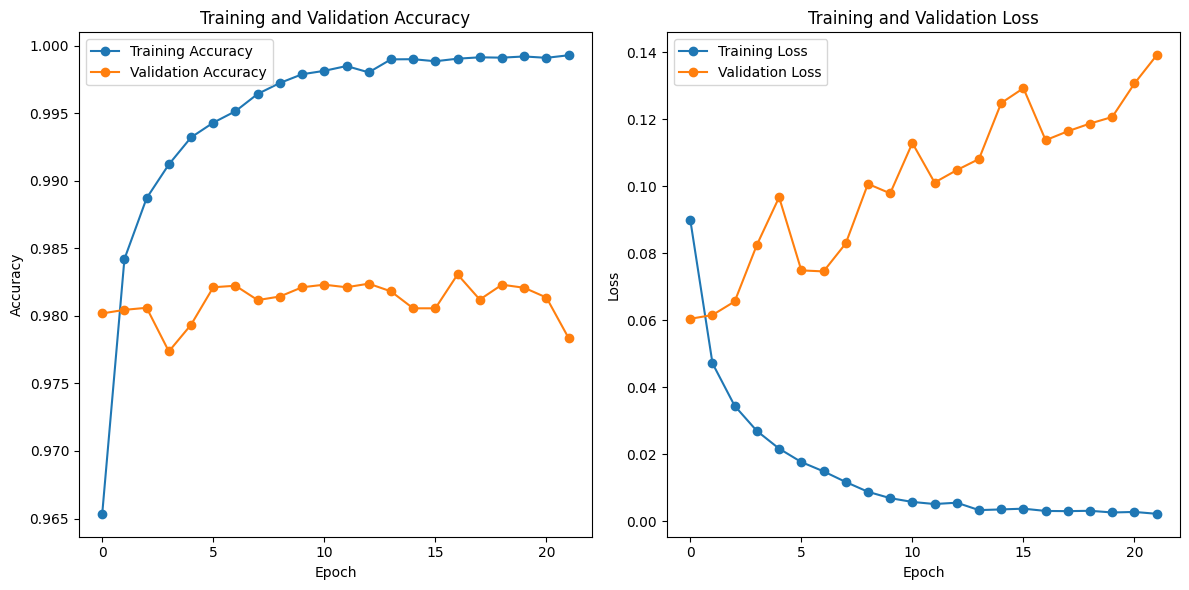

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9805924800607673 Test Loss: 0.12375319942523154


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.97

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.99      0.98     15929
        Hate       0.98      0.97      0.98     10401

    accuracy                           0.98     26330
   macro avg       0.98      0.98      0.98     26330
weighted avg       0.98      0.98      0.98     26330



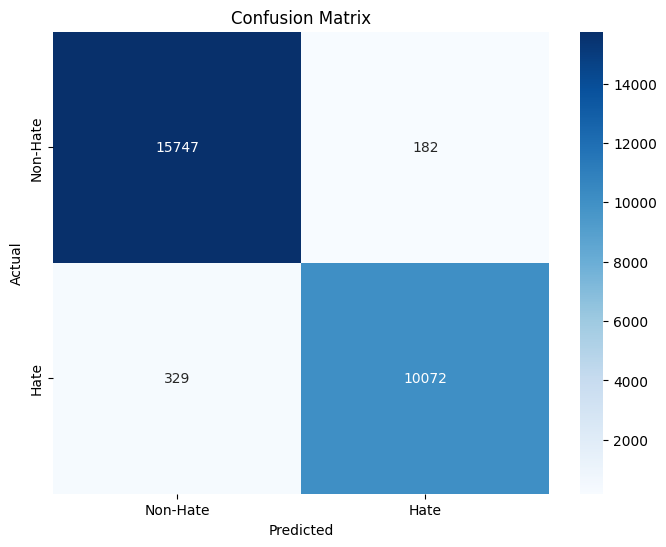

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.51
